**Credit Card Fraud Detection Project**





**Introduction**

*The purpose of the project is to develop a machine learning model for credit card fraud detection. Credit card fraud is a pervasive issue that can result in significant financial losses and damage to an organization's reputation. The significance of this project lies in its potential to proactively identify and prevent fraudulent transactions, thereby safeguarding the financial interests of both the organization and its customers. By leveraging advanced machine learning techniques, we aim to enhance the security of financial transactions and reduce the impact of credit card fraud, ultimately leading to increased trust and confidence among customers and stakeholders.*

Problem **Statement**

Credit card fraud is a widespread problem in the world of financial transactions. It occurs when unauthorized individuals use stolen or counterfeit credit card information to make fraudulent purchases or withdrawals. The problem has several significant implications for organizations:

1. Financial Losses: Credit card fraud can lead to substantial financial losses for both the organization and its customers. When fraudulent transactions go undetected, the organization is typically responsible for refunding the affected customers, resulting in direct financial losses.

2. Increased Operational Costs: Organizations must invest in fraud prevention measures, such as fraud detection systems and personnel to investigate suspicious activities. These added operational costs can impact the bottom line.

3. Reputation Damage: Frequent incidents of credit card fraud can damage an organization's reputation and erode customer trust. Customers may become hesitant to use their credit cards with the company, leading to a loss of business.

4. Legal and Regulatory Consequences: Organizations are often subject to legal and regulatory obligations to protect customer data and financial transactions. Failure to prevent credit card fraud can result in regulatory fines and legal liabilities.

5. Customer Inconvenience: Customers who experience credit card fraud often face the inconvenience of canceled cards, disputes, and the need to update payment information for various services. This can lead to customer dissatisfaction and may result in customer churn.



**Project Objectives:**

Objective 1: Perform in-depth analysis on the dataset to identify potential fraudulent transactions
and distinguish them from legitimate ones. Objective 2: Visualize and compare fraudulent and
genuine transactions based on various features. Objective 3: Implement machine learning models
to detect fraudulent activities and evaluate their performance metrics.

**Dataset Desription**

This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities.

Key Features:
id: Unique identifier for each transaction
V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
Amount: The transaction amount
Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing libraries needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading in our dataset
df = pd.read_csv('/content/drive/MyDrive/Data Science/Final Project/creditcard_2023.csv')

In [ ]:
# Displaying the initial rows of the dataset
print("Initial few rows of the dataset: ")
df.head()

Initial few rows of the dataset: 


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
# Checking the numbers of rows and columns of our data
df.shape

(568630, 31)

The data contains 568630 rows and 31 columns


In [ ]:
# Getting an overview of the features and their types in the dataset
print("\nOverview of the features and their types:")
df.info()


Overview of the features and their types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20  

In [ ]:
# Checking for missing values in the dataset
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

This shows our data does not contain any missing value

In [ ]:
# Checking for duplicated values
df.duplicated().sum()

0

Our dataset does not contains any duplicated value

In [ ]:
# Checking the columns names for our data
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Exploratory** **Data** **Analysis**

In [ ]:
# Checking the value count for our class columns
df['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

0 means the valid transaction
1 means fraud transaction

Valid transaction is 284315



Fraudulent transaction is 284315




In [ ]:
# Checking the Amount details of Fraud transaction
fraud = df[df['Class'] == 1]
fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [ ]:
# Checking the Amount details of Valid Transactions
valid_t = df[df['Class'] == 0]
valid_t.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

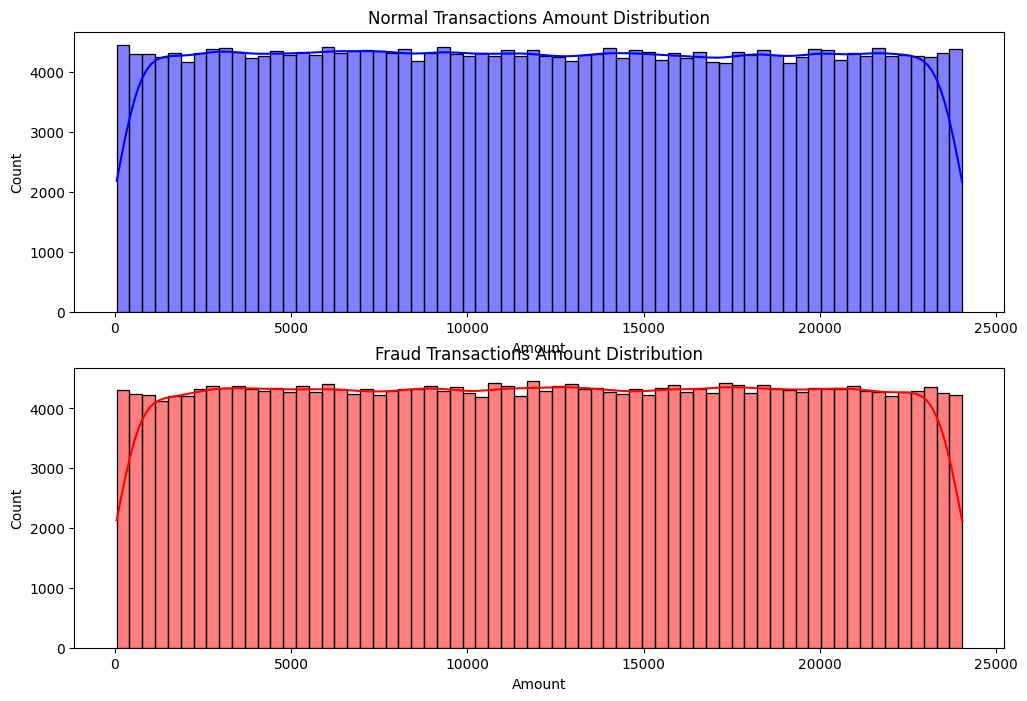

In [ ]:
# Visualizing the distribution of transaction amounts for fraudulent and genuine transactions in more detail
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(df[df['Class'] == 0]["Amount"], color='b', kde=True)
plt.title('Normal Transactions Amount Distribution')
plt.subplot(2, 1, 2)
sns.histplot(df[df['Class'] == 1]["Amount"], color='r', kde=True)
plt.title('Fraud Transactions Amount Distribution')
plt.show()

**Plotting** **the** **Correlation** **Matrix**

The correlation matrix is a statistical technique that gives you the values between -1 to 1 which you can determine the relationship between variables.


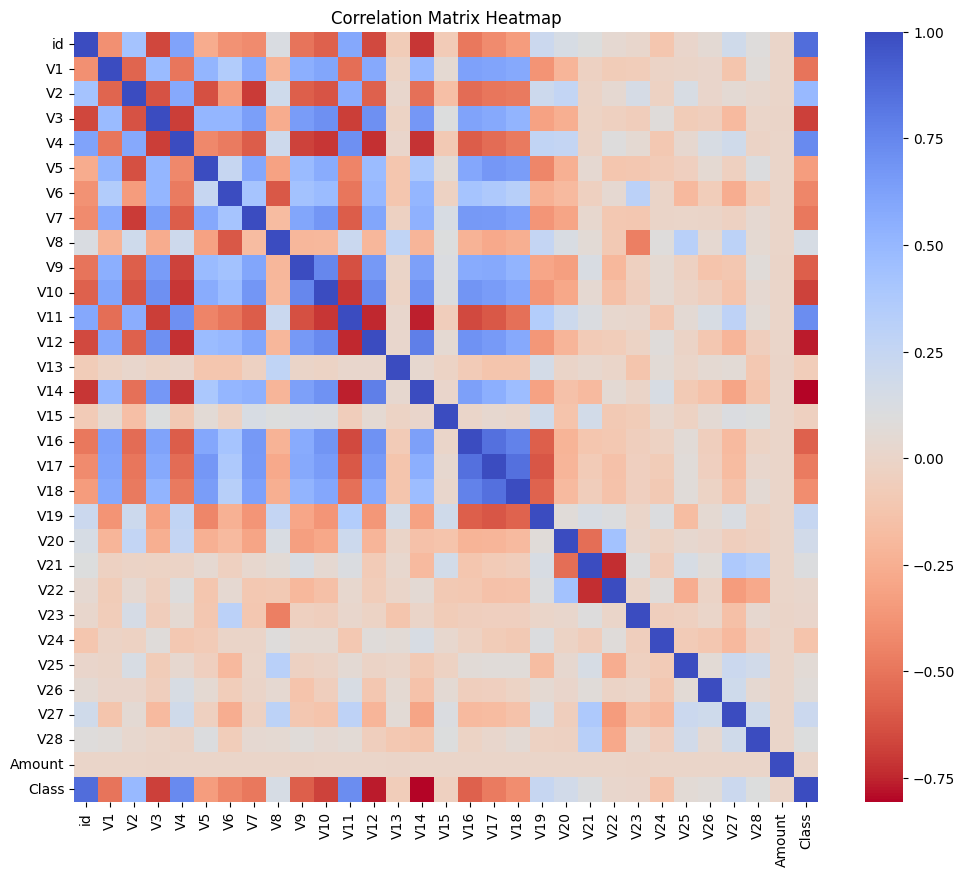

In [ ]:
# Analyzing the correlation between features using a heatmap
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

Preparing our data for a supervised learning task, where we want to predict a target variable ("y") based on a set of input features ("x")

In [ ]:
# Seperating the x and y values
x = df.drop(['Class'], axis=1)
y = df['Class']

In [ ]:
# Converting the pandas dataframe to numpy array
x = x.values
y = y.values

Train/Test Set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Building a Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

Prediction

In [ ]:
y_predict = model.predict(x_test)
print(y_predict)

[1 1 0 ... 1 1 1]


**Accuracy Evaluation**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
acc = accuracy_score(y_test, y_predict)
print(f'Accuracy Score:{acc*100}')
print(f'Classification Report:\n', classification_report(y_test, y_predict))


Accuracy Score:99.98124146340034
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589




**Accuracy Score: 99.98%**
- Accuracy is a measure of the proportion of correctly classified instances (both true positives and true negatives) out of the total instances.
- An accuracy score of 99.98% suggests that the model correctly classified almost all instances in the dataset.

**Classification Report:**
- The classification report provides additional insights into model performance, including precision, recall, and F1-score for each class.

**Class 0 (Valid Transaction):**
- Precision: 1.00
  - This indicates that all instances predicted as class 0 were indeed class 0.
- Recall: 1.00
  - All actual instances of class 0 were correctly identified.
- F1-score: 1.00
  - The F1-score is the harmonic mean of precision and recall and is also 1.00.

**Class 1 (Frauduent Transaction):**
- Precision: 1.00
  - This indicates that all instances predicted as class 1 were indeed class 1.
- Recall: 1.00
  - All actual instances of class 1 were correctly identified.
- F1-score: 1.00
  - The F1-score for class 1 is also 1.00.

**Overall Metrics:**
- The overall accuracy, precision, recall, and F1-score are calculated for the entire dataset, considering both classes.
- Accuracy: 99.98%
- Macro average:
  - The macro average calculates the average of precision, recall, and F1-score for each class independently and then takes the average of those averages.
- Weighted average:
  - The weighted average calculates the average of precision, recall, and F1-score for each class, with the average weighted by the number of instances in each class.

The model appears to have performed exceptionally well with an accuracy score of 99.98%.

**Building a Logistic Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
L_model = LogisticRegression()
L_model.fit(x_train, y_train)

LogisticRegression()

Prediction

In [ ]:
L_predict = L_model.predict(x_test)
print(y_predict)

[1 1 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
acc = accuracy_score(y_test, L_predict)
print(f'Accuracy Score:{acc*100}')
print(f'Classification Report:\n', classification_report(y_test, L_predict))


Accuracy Score:78.96992185897098
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76     85149
           1       0.73      0.92      0.81     85440

    accuracy                           0.79    170589
   macro avg       0.81      0.79      0.79    170589
weighted avg       0.81      0.79      0.79    170589



In [ ]:
# Importing libraries needed for the project
%%writefile app1.py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import streamlit as st
from joblib import dump, load


df = pd.read_csv(/content/drive/MyDrive/Data Science/Final Project/creditcard_2023.csv)

X = df.drop(['Class'], axis=1)
Y = df["Class"]

#(its a numpy array with no columns)
xData = X.values
yData = Y.values

X_train, X_test, y_train, y_test = train_test_split(xData,yData, test_size=0.3, random_state=42)


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


# Web app

st.title('Credit Card Fraud Detection Model')
input_df = st.text_input('Enter AlL Required Features Values')
input_df_splited = input_df.split(',')

submit = st.button('Submit')

if submit:
    features = np.asarray(input_df_splited, dtype=np.float64)
    prediction = rfc.predict(features.reshape(1,-1))


    if prediction[0] == 0:
        st.write('Legitimate Transaction')
    else:
        st.write('Fraudulent Transaction')

Writing app1.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.148.77.86


In [ ]:
!pip install RISE
!jupyter-nbextension install rise --py --sys-prefix
!jupyter-nbextension enable rise --py --sys-prefix


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.7 MB/s eta 0:00:00
Installing /usr/local/lib/python3.10/dist-packages/rise/static -> rise
Making directory: /usr/share/jupyter/nbextensions/rise/
Copying: /usr/local/lib/python3.10/dist-packages/rise/static/rise.png -> /usr/share/jupyter/nbextensions/rise/rise.png
Copying: /usr/local/lib/python3.10/dist-packages/rise/static/rise.yaml -> /usr/share/jupyter/nbextensions/rise/rise.yaml
Copying: /usr/local/lib/python3.10/dist-packages/rise/static/main.css -> /usr/share/jupyter/nbextensions/rise/main.css
Copying: /usr/local/lib/python3.10/dist-packages/rise/static/main.js -> /usr/share/jupyter/nbextensions/rise/main.js
Copying: /usr/local/lib/python3.10/dist-packages/rise/static/README.md -> /usr/share/jupyter/nbextensions/rise/README.md
Making directory: /usr/share/jupyter/nbextensions/rise/reveal.js
Copying: /usr/local/lib/python3.10/dist-packages/rise

In [ ]:
!rise <Fraud Credit Card Analysis.ipynb>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `rise <Fraud Credit Card Analysis.ipynb>'
